<a href="https://colab.research.google.com/github/HieuQCao/Machine-Learning-with-Finance/blob/main/ARIMA_with_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import seaborn
import sklearn
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [6]:
df = yf.Ticker("MSFT")
df = df.history(start="2000-01-02",end="2023-01-01")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,36.316959,36.703721,34.653882,36.065563,53228400,0.0,0.0
2000-01-04 00:00:00-05:00,35.137346,36.239619,34.731246,34.847275,54119000,0.0,0.0
2000-01-05 00:00:00-05:00,34.383149,36.007550,33.841682,35.214687,64059600,0.0,0.0
2000-01-06 00:00:00-05:00,34.711902,35.234031,33.532278,34.035069,54976600,0.0,0.0
2000-01-07 00:00:00-05:00,33.609628,34.731239,33.203528,34.479843,62013600,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,233.602848,236.333535,231.455892,236.195023,21207000,0.0,0.0
2022-12-27 00:00:00-05:00,236.165346,236.392900,233.325827,234.443832,16688600,0.0,0.0
2022-12-28 00:00:00-05:00,234.374568,237.174519,231.683449,232.039627,17457100,0.0,0.0


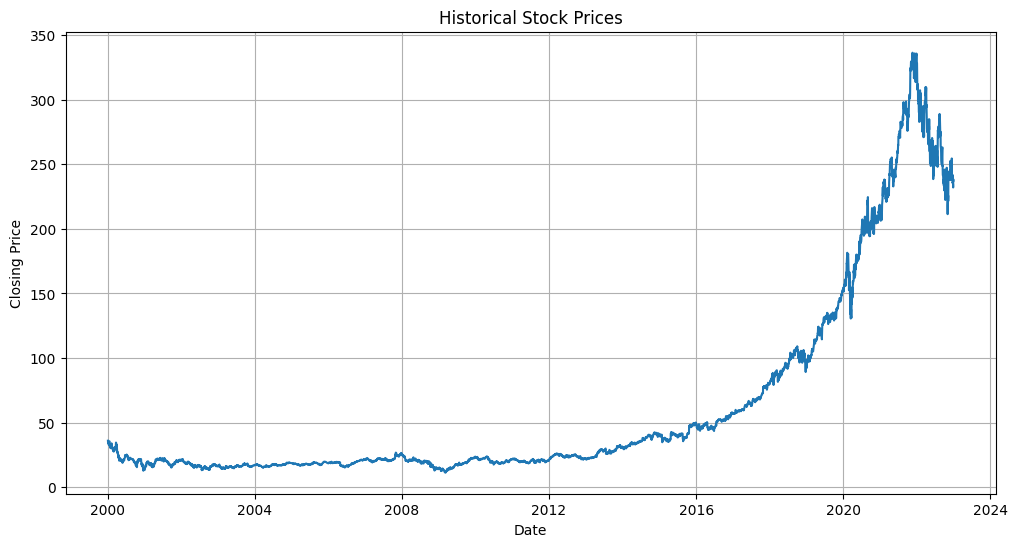

In [8]:
# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Stock Prices')
plt.grid(True)
plt.show()

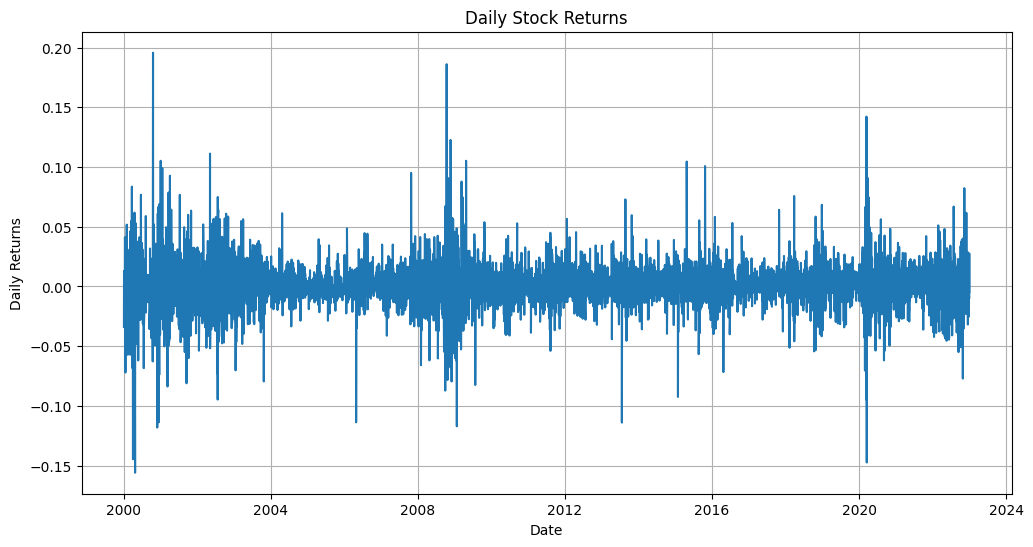

In [12]:
# Calculate the daily returns
returns = df["Close"].pct_change()

# Plot the daily returns
plt.figure(figsize=(12, 6))
plt.plot(returns)
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.title("Daily Stock Returns")
plt.grid(True)
plt.show()

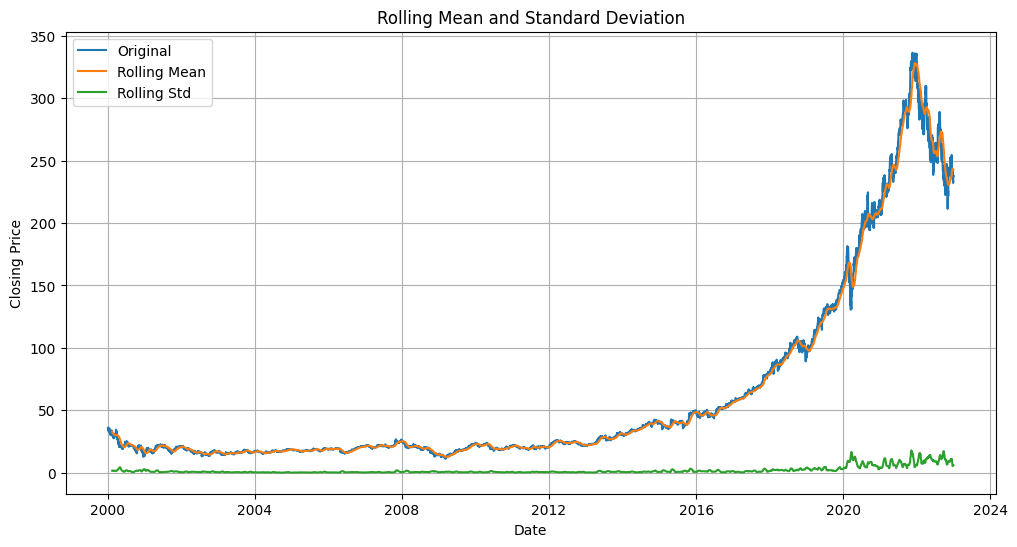

In [13]:
# Plot the rolling mean and standard deviation
rolling_mean = df["Close"].rolling(window=30).mean()
rolling_std = df["Close"].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Original")
plt.plot(rolling_mean, label="Rolling Mean")
plt.plot(rolling_std, label="Rolling Std")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Rolling Mean and Standard Deviation")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Calculate summary statistics
statistics = df["Close"].describe()
print(statistics)

count    5787.000000
mean       61.532746
std        76.249825
min        11.283756
25%        18.882758
50%        22.834566
75%        59.992165
max       336.315308
Name: Close, dtype: float64


In [42]:
# Perform the ADF test
result = adfuller(df["Close"])

# Extract and print the test statistics
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")
if result[1] >0.05:
  print("P-value is too high, take the difference")

ADF Statistic: 1.4145191495739895
p-value: 0.9971791121750835
Critical Values:
1%: -3.431487381900231
5%: -2.862042614273643
10%: -2.5670375396995615
P-value is too high, take the difference


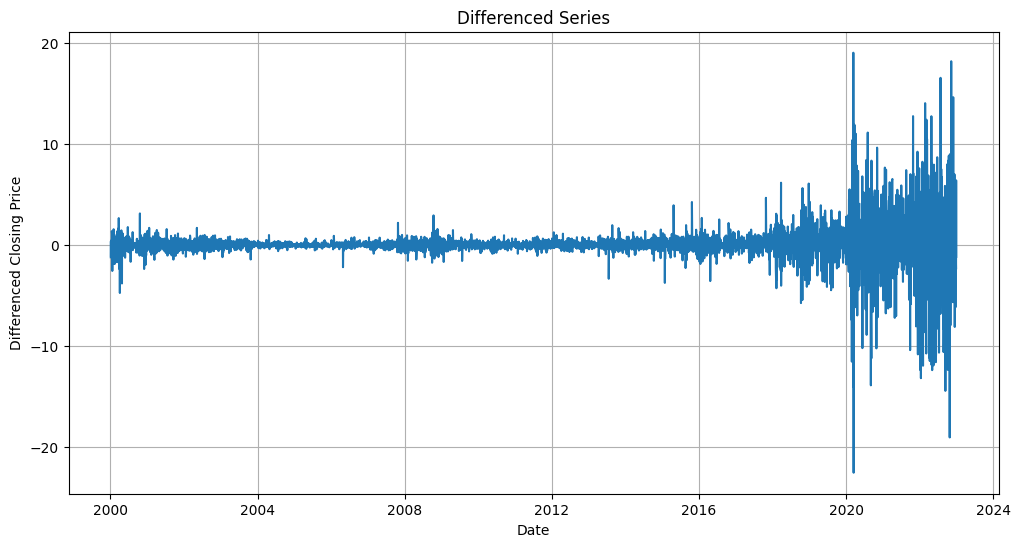

In [27]:
# Perform differencing
differenced = df["Close"].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(differenced)
plt.xlabel("Date")
plt.ylabel("Differenced Closing Price")
plt.title("Differenced Series")
plt.grid(True)
plt.show()

In [43]:
result = adfuller(differenced)
# Extract and print the test statistics
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")
if result[1] >0.05:
  print("P-value is too high, take the difference")

ADF Statistic: -14.463307183192834
p-value: 6.790970452364997e-27
Critical Values:
1%: -3.431487381900231
5%: -2.862042614273643
10%: -2.5670375396995615


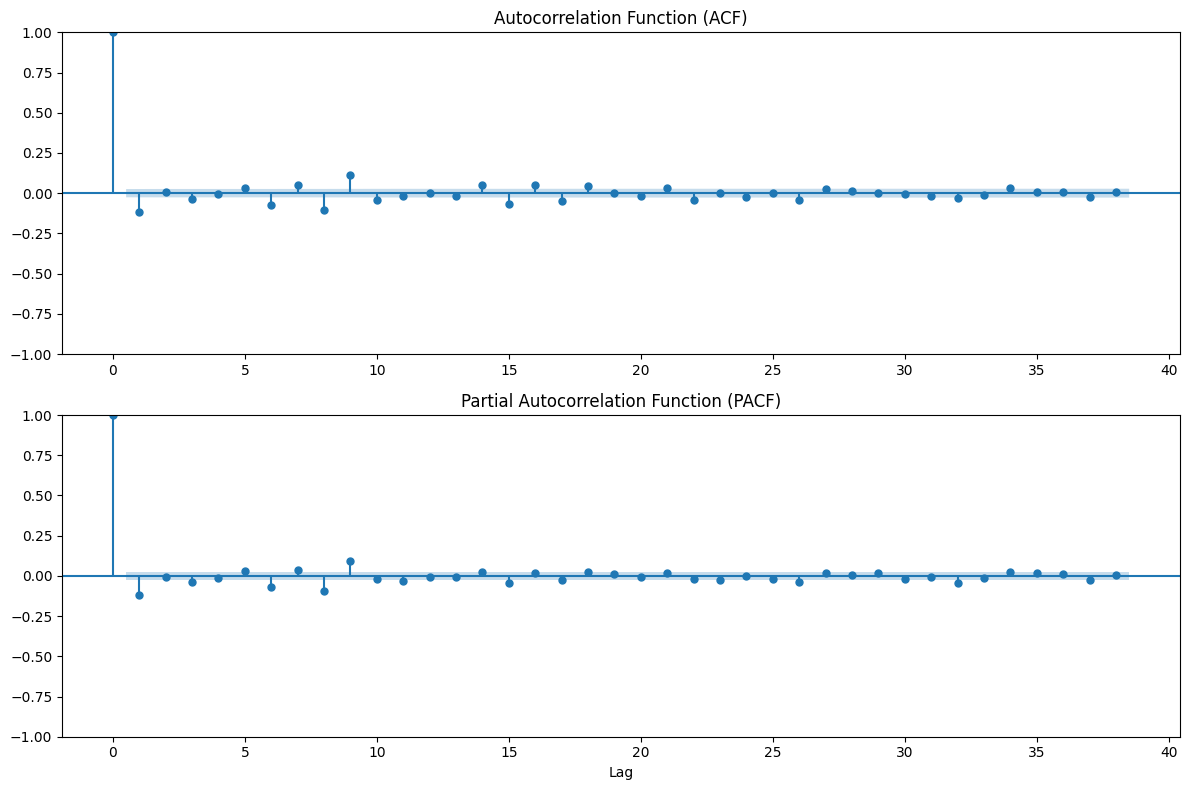

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# Plot the ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(differenced, ax=ax[0])
plot_pacf(differenced, ax=ax[1])
plt.xlabel("Lag")
ax[0].set_title("Autocorrelation Function (ACF)")
ax[1].set_title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()

In [123]:
from statsmodels.tsa.arima.model import ARIMA

 #Fit the ARIMA model
model = ARIMA(differenced, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5786
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11661.661
Date:                Wed, 13 Mar 2024   AIC                          23329.323
Time:                        19:31:45   BIC                          23349.312
Sample:                             0   HQIC                         23336.277
                               - 5786                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1203      0.004    -29.350      0.000      -0.128      -0.112
ma.L1         -0.9992      0.000  -3487.682      0.000      -1.000      -0.999
sigma2         3.2958      0.018    185.387      0.0

In [124]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Create the forecast index
forecast_index = pd.date_range(start=df.index[-1], periods=30, freq="B")

# Convert the forecast to a DataFrame
forecast_df = pd.DataFrame(forecast,forecast_index)






/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [125]:
forecast_index_df=pd.DataFrame(forecast_index)
forecast_index_df

,0
0,2022-12-30 00:00:00-05:00
1,2023-01-02 00:00:00-05:00
2,2023-01-03 00:00:00-05:00
3,2023-01-04 00:00:00-05:00
4,2023-01-05 00:00:00-05:00
5,2023-01-06 00:00:00-05:00
6,2023-01-09 00:00:00-05:00
7,2023-01-10 00:00:00-05:00
8,2023-01-11 00:00:00-05:00
9,2023-01-12 00:00:00-05:00


In [126]:
forecast_d=pd.DataFrame(forecast)
forecast_d.reset_index(inplace=True)
forecast_d
#forecast_df.pop('level_0')
forecast_d.pop('index')
forecast_d


,predicted_mean
0,0.224051
1,0.055439
2,0.075726
3,0.073285
4,0.073579
5,0.073543
6,0.073548
7,0.073547
8,0.073547
9,0.073547


In [118]:
forecast_df=forecast_d.join(forecast_index_df)

In [119]:
forecast_df = forecast_df.rename(columns={forecast_df.columns[1]: 'date'})
forecast_df = forecast_df.rename(columns={forecast_df.columns[0]:'Forecast'})

In [120]:
forecast_df['date'] = pd.to_datetime(forecast_df['date'])  # Convert the 'date' column to datetime format
forecast_df.set_index('date', inplace=True)

In [122]:
forecast_df

,Forecast
date,
2022-12-30 00:00:00-05:00,0.224051
2023-01-02 00:00:00-05:00,0.055439
2023-01-03 00:00:00-05:00,0.075726
2023-01-04 00:00:00-05:00,0.073285
2023-01-05 00:00:00-05:00,0.073579
2023-01-06 00:00:00-05:00,0.073543
2023-01-09 00:00:00-05:00,0.073548
2023-01-10 00:00:00-05:00,0.073547
2023-01-11 00:00:00-05:00,0.073547


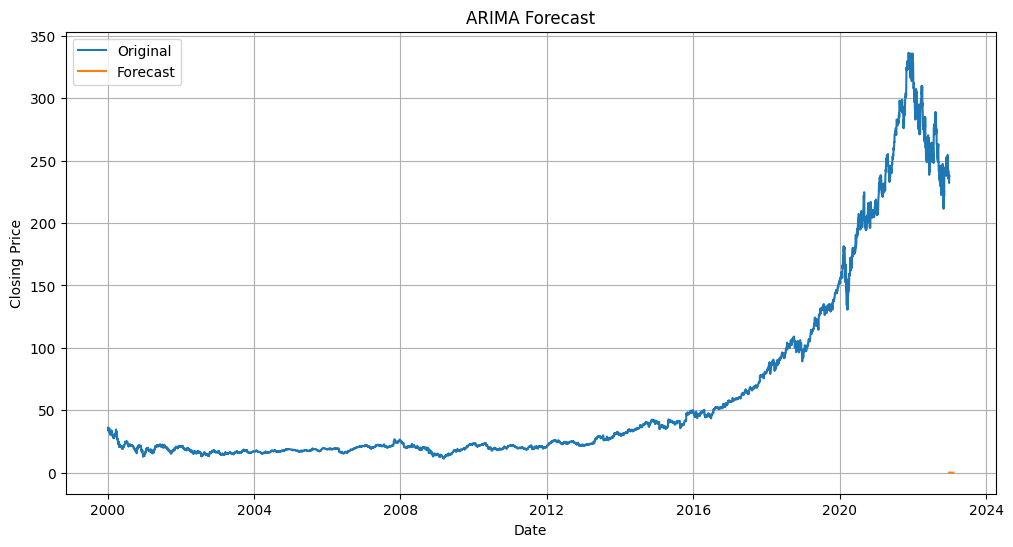

In [121]:
# Plot the original series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Original")
plt.plot(forecast_df["Forecast"], label="Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("ARIMA Forecast")
plt.legend()
plt.grid(True)
plt.show()